NAME       : LATHIKA M
ROLL NO    : 24BAD062
SCENARIO 1 : MULTI REGRESSION
MSE : 179.86889315878835
RMSE: 13.411520911469674
R2 Score: 0.16092842295469123

Regression Coefficients:
                                          Feature  Coefficient
13                                 lunch_standard     4.413070
7                          race/ethnicity_group E     2.068714
6                          race/ethnicity_group D     1.661021
8   parental level of education_bachelor's degree     1.124503
10    parental level of education_master's degree     0.457042
5                          race/ethnicity_group C     0.432413
1                                      attendance     0.312428
0                                     study_hours     0.037356
4                          race/ethnicity_group B    -0.056018
2                                     sleep_hours    -0.130766
11       parental level of education_some college    -0.362191
12   parental level of education_some high school    -1.259192


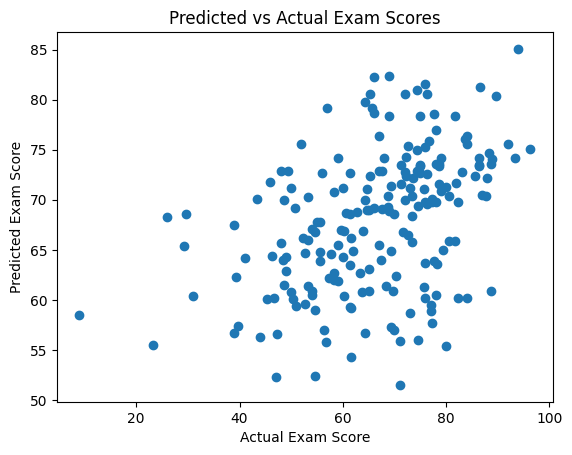

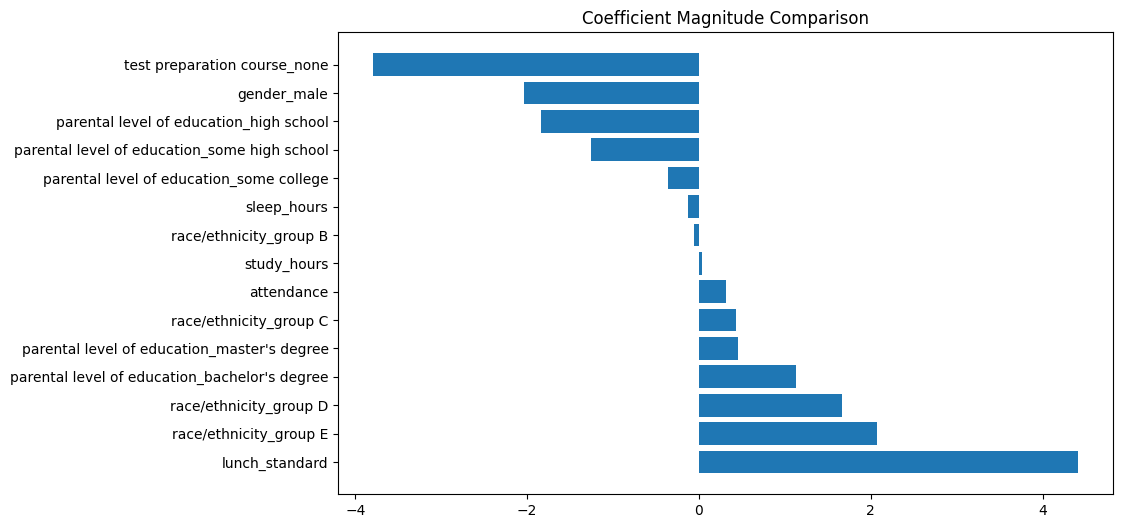

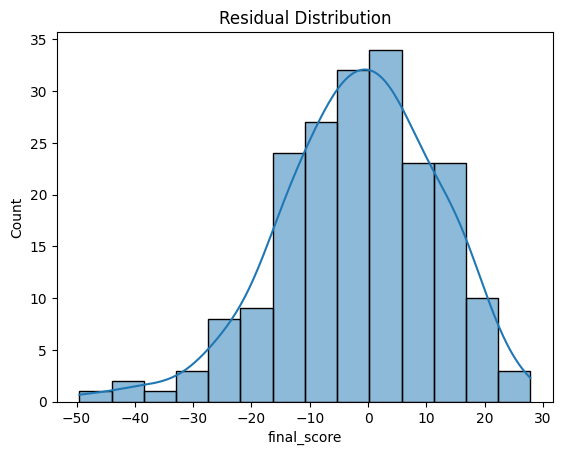

In [2]:
print("NAME       : LATHIKA M")
print("ROLL NO    : 24BAD062")
print("SCENARIO 1 : MULTI REGRESSION")

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("/kaggle/input/students-performance-in-exams/StudentsPerformance.csv")


df["final_score"] = df[["math score", "reading score", "writing score"]].mean(axis=1)


np.random.seed(0)
df["study_hours"] = np.random.randint(1, 10, len(df))
df["attendance"] = np.random.randint(60, 100, len(df))
df["sleep_hours"] = np.random.randint(4, 9, len(df))


df = pd.get_dummies(df, drop_first=True)


X = df.drop(
    ["math score", "reading score", "writing score", "final_score"], axis=1
)
y = df["final_score"]


X = X.apply(pd.to_numeric, errors="coerce")
X.fillna(X.mean(), inplace=True)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE :", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)


coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

print("\nRegression Coefficients:")
print(coefficients)


ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
print("\nRidge R2 Score:", r2_score(y_test, ridge_pred))


lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

lasso_coeff = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lasso.coef_
})

print("\nLasso Coefficients:")
print(lasso_coeff)


plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Predicted vs Actual Exam Scores")
plt.show()


plt.figure(figsize=(10,6))
plt.barh(coefficients["Feature"], coefficients["Coefficient"])
plt.title("Coefficient Magnitude Comparison")
plt.show()


residuals = y_test - y_pred
plt.figure()
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()


NAME       : LATHIKA M
ROLL NO    : 24BAD062
SCENARIO 2 : POLYNOMIAL REGRESSIO


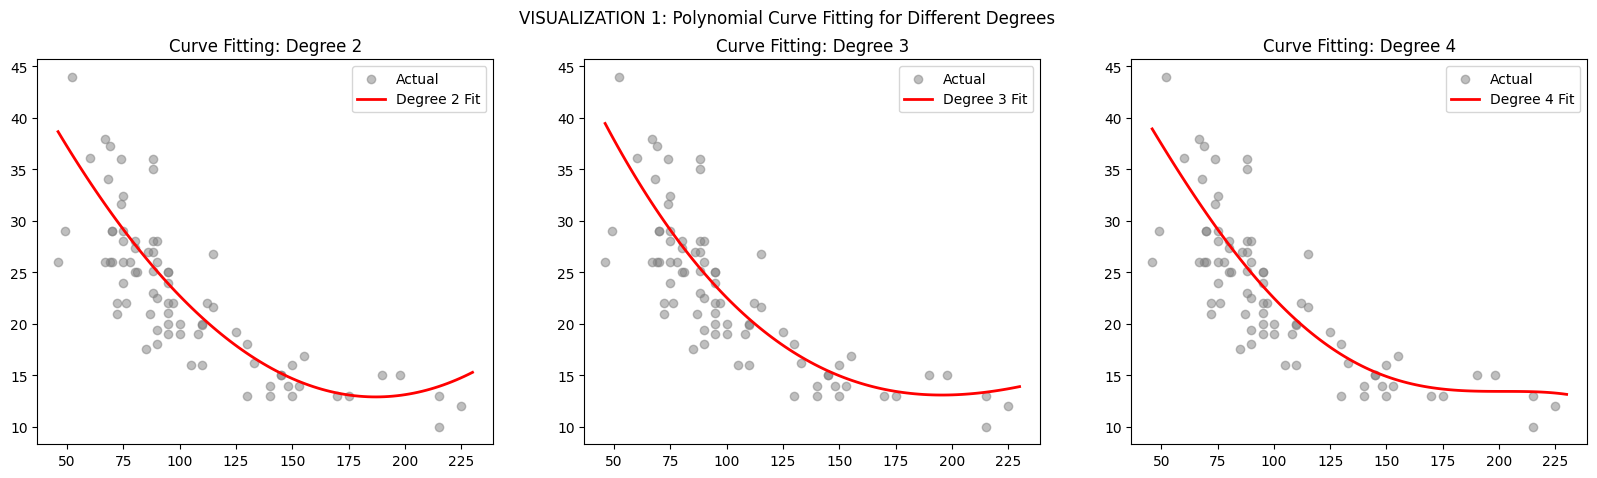

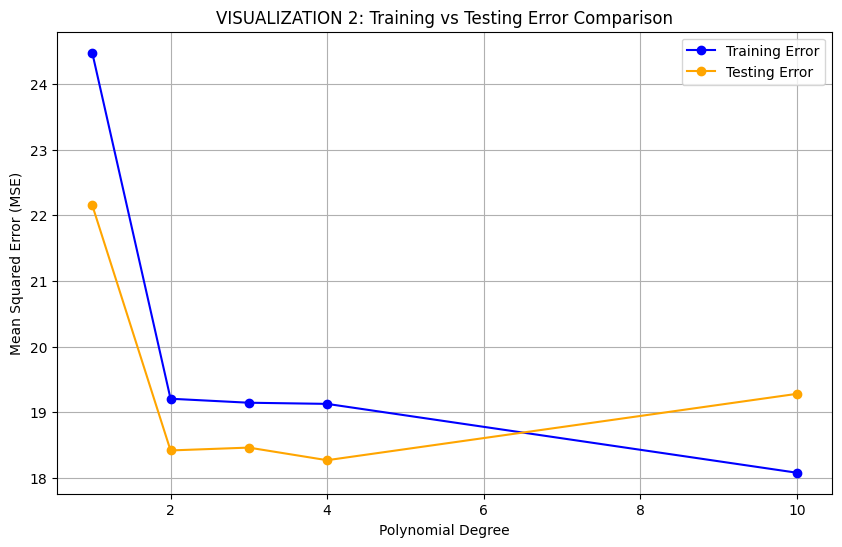

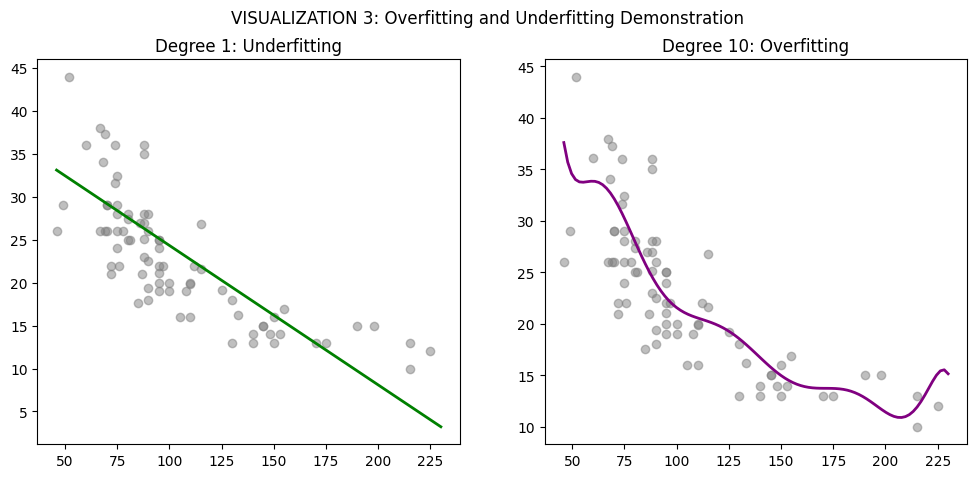


--- Task 11: Performance Comparison ---
   Degree        MSE      RMSE        R2
0       2  18.416968  4.291499  0.639170
1       3  18.460267  4.296541  0.638322
2       4  18.268227  4.274135  0.642084

--- Task 12: Ridge Regression (Degree 4) ---
Ridge R2 Score: 0.6413


In [6]:
print("NAME       : LATHIKA M")
print("ROLL NO    : 24BAD062")
print("SCENARIO 2 : POLYNOMIAL REGRESSIO")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

# 1 & 2. Load and clean the Auto MPG dataset
# Using local Kaggle path provided to fix name resolution errors
file_path = "/kaggle/input/autompg-dataset/auto-mpg.csv"
df = pd.read_csv(file_path)

# 3 & 4. Select horsepower and handle missing values
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df = df.dropna(subset=['horsepower', 'mpg'])

X = df[['horsepower']].values
y = df['mpg'].values

# 7. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Apply feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Containers for metrics and visualization
degrees = [1, 2, 3, 4, 10] # Added 1 (underfit) and 10 (overfit) for demonstration
train_errors = []
test_errors = []
comparison_metrics = []

# --- PART 1: Polynomial Curve Fitting (Visual 1) ---
plt.figure(figsize=(20, 5))
for i, degree in enumerate([2, 3, 4]):
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train_scaled)
    X_poly_test = poly.transform(X_test_scaled)
    
    model = LinearRegression()
    model.fit(X_poly_train, y_train)
    y_pred = model.predict(X_poly_test)
    
    # Store metrics for Task 11
    mse = mean_squared_error(y_test, y_pred)
    comparison_metrics.append({'Degree': degree, 'MSE': mse, 'RMSE': np.sqrt(mse), 'R2': r2_score(y_test, y_pred)})
    
    plt.subplot(1, 3, i+1)
    plt.scatter(X_test, y_test, color='gray', alpha=0.5, label='Actual')
    X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_line_pred = model.predict(poly.transform(scaler.transform(X_line)))
    plt.plot(X_line, y_line_pred, color='red', linewidth=2, label=f'Degree {degree} Fit')
    plt.title(f'Curve Fitting: Degree {degree}')
    plt.legend()

plt.suptitle("VISUALIZATION 1: Polynomial Curve Fitting for Different Degrees")
plt.show()

# --- PART 2: Training vs Testing Error Comparison (Visual 2) ---
for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_p_train = poly.fit_transform(X_train_scaled)
    X_p_test = poly.transform(X_test_scaled)
    
    model = LinearRegression()
    model.fit(X_p_train, y_train)
    
    train_errors.append(mean_squared_error(y_train, model.predict(X_p_train)))
    test_errors.append(mean_squared_error(y_test, model.predict(X_p_test)))

plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, label='Training Error', marker='o', color='blue')
plt.plot(degrees, test_errors, label='Testing Error', marker='o', color='orange')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('VISUALIZATION 2: Training vs Testing Error Comparison')
plt.legend()
plt.grid(True)
plt.show()

# --- PART 3: Overfitting and Underfitting Demonstration (Visual 3) ---
# We compare Degree 1 (Underfit) vs Degree 10 (Overfit)
plt.figure(figsize=(12, 5))

for i, d in enumerate([1, 10]):
    poly = PolynomialFeatures(degree=d)
    model = LinearRegression().fit(poly.fit_transform(X_train_scaled), y_train)
    
    plt.subplot(1, 2, i+1)
    plt.scatter(X_test, y_test, color='gray', alpha=0.5)
    X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_line_pred = model.predict(poly.transform(scaler.transform(X_line)))
    plt.plot(X_line, y_line_pred, color='green' if d==1 else 'purple', linewidth=2)
    plt.title(f'Degree {d}: {"Underfitting" if d==1 else "Overfitting"}')

plt.suptitle("VISUALIZATION 3: Overfitting and Underfitting Demonstration")
plt.show()

# 11. Compare performance (Textual output)
print("\n--- Task 11: Performance Comparison ---")
print(pd.DataFrame(comparison_metrics))

# 12. Ridge Regression
print("\n--- Task 12: Ridge Regression (Degree 4) ---")
poly4 = PolynomialFeatures(degree=4)
ridge = Ridge(alpha=1.0).fit(poly4.fit_transform(X_train_scaled), y_train)
y_ridge = ridge.predict(poly4.transform(X_test_scaled))
print(f"Ridge R2 Score: {r2_score(y_test, y_ridge):.4f}")